# Objective - To predict the percentage of a student based on the number of a student study hours

# IMPORTING LIBRARIES

In [1]:
import pandas as pd                     # LIBRARY USED FOR DATA ANALYSIS
import numpy as np                      # LIBRARY USED FOR MATHEMATICAL OPERATIONS
import seaborn as sns                   # LIBRARY USED FOR DATA VISUALIZATION
import matplotlib.pyplot as plt         # LIBRARY USED FOR DATA VISUALIZATION
%matplotlib inline                      

# READING THE DATA

In [2]:
df = pd.read_csv("student.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# EXPLORATORY DATA ANALYSIS

# CHECKING FOR THE SHAPE OF THE DATASET  i.e no.of rows and columns

In [3]:
df.shape     

(25, 2)

# CHECKING FOR THE NULL VALUES IN THE DATA

In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# CHECKING FOR THE DUPLICATE ENTERIES IN THE DATA

In [5]:
df.duplicated().sum()

0

# LOOKING FOR THE INFORMATION OF THE DATASET

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Regplot is a plot with regression line and confidence interval band.

C:\Users\Gunjan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Scores')

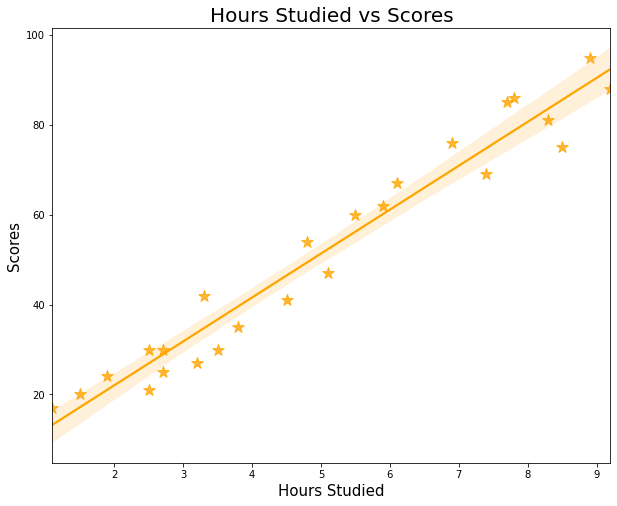

In [7]:
plt.figure(figsize=(10,8))                                                              # defining the canvas width and height
x = df['Hours']                                                                         # defining x-axis values
y = df['Scores']                                                                        # defining y-axis values
sns.regplot(x,y,color='orange',marker="*",scatter_kws={"s": 150})                       # creating the regplot
plt.title('Hours Studied vs Scores', size=20)                                           # defining the title for the plot
plt.xlabel('Hours Studied',size=15)                                                     # defining the x-axis label
plt.ylabel('Scores',size=15)                                                            # defining the y-axis label

# STATISTICS OF THE DATA

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# CORRELATION OF THE DATASET

<AxesSubplot:>

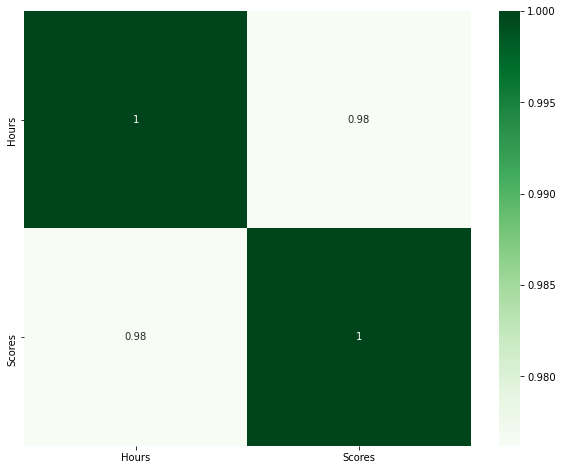

In [9]:
plt.figure(figsize=(10,8)) 
corr = df.corr()                                      
sns.heatmap(corr,annot=True,cmap="Greens")            # Representing correlation matrix with a heatmap

# SPLITTING X (INDEPENDENT FEATURE/DESCRIPTIVE FEATURE) AND Y (DEPENDENT FEATURE/ TARGET FEATURE) 

In [10]:
X = df.iloc[:,:-1].values                     # iloc is used to retrieve information by index position
y = df.iloc[:,-1].values

# SPLITTING TRAIN AND TEST DATA 

In [11]:
from sklearn.model_selection import train_test_split  

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [13]:
X_train.shape                      # checking for the shape of X_train 

(20, 1)

In [14]:
X_test.shape                       # checking for the shape of X_test

(5, 1)

# CREATING AND FITTING THE LINEAR REGRESSION MODEL

In [15]:
from sklearn.linear_model import LinearRegression  

In [16]:
reg_model = LinearRegression()                        # creating linear regression object
reg_model.fit(X_train, y_train)                       # fitting the model using train data

LinearRegression()

In [17]:
reg_model.get_params()                               # getting parameters for our model

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

# CHECKING FOR THE INTERCEPT VALUE (intercept is a point on the y-axis, through which the slope of the line passes)

In [18]:
reg_model.intercept_

2.018160041434683

# CHECKING FOR THE SLOPE VALUE (it is the 'steepness' of the line, also commonly known as rise over run)

In [19]:
reg_model.coef_

array([9.91065648])

# CHECKING THE TRAIN DATA ACCURACY 

In [20]:
reg_model.score(X_train,y_train)

0.9515510725211552

# CHECKING THE TEST DATA ACCURACY 

In [21]:
reg_model.score(X_test,y_test)

0.9454906892105356

# ALL THE PREDICTED VALUES BY OUR MODEL

In [22]:
y_pred = reg_model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# CREATING A DATAFRAME FOR ACTUAL AND PREDICTED VALUES 

In [23]:
new_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})  
new_df 

,Actual Values,Predicted Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# CREATING A COMBINED PLOT (TRAIN DATA, TEST DATA, REGRESSION LINE)

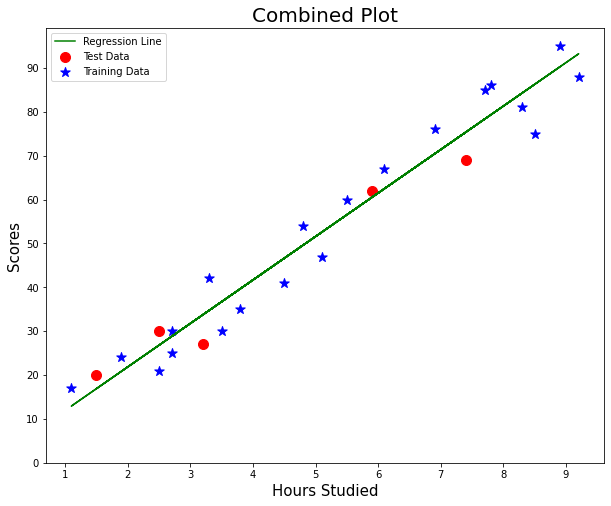

In [24]:
plt.figure(figsize=(10,8))                                                        # defining the canvas width and height        
plt.scatter(X_test, y_test, color = 'red', label = 'Test Data',s=100)                        # plotting test data
plt.scatter(X_train,y_train, color = 'blue', label = 'Training Data',marker="*", s=100)      # plotting train data
plt.plot(X,reg_model.predict(X), color = 'green', label = 'Regression Line')                 # plotting regression line
plt.xlabel('Hours Studied', size=15)                                                         # defining the x-axis label
plt.ylabel('Scores', size=15)                                                                # defining the y-axis label
plt.title("Combined Plot", size=20)                                                          # plotting the combined plot 
plt.yticks(range(0,100,10))                                                                  # defining the y-axis range
plt.legend()                                                                                 # defining the legend for the plot

# MODEL EVALUATION

# R2 SCORE  (Coefficient of Determination)

In [25]:
reg_model.score(X_test,y_test)               

0.9454906892105356

# MEAN ABSOLUTE ERROR

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred,y_test)

4.183859899002975

# MEAN SQUARED ERROR

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

21.5987693072174

# ROOT MEAN SQUARED ERROR

In [28]:
mean_squared_error(y_pred,y_test,squared=False)

4.6474476121003665

# MEAN SQUARED LOG ERROR

In [29]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_pred,y_test)

0.018454923013931777

# QUES. What will be predicted score if a student studies for 9.25 hrs/ day?

# PREDICTING SCORE FOR 9.25 HOURS/DAY

In [30]:
reg_model.predict([[9.25]])

array([93.69173249])